In [1]:
print("""
Immadi Shyam Prasad    (AM.EN.U4CSE19164)
D B R S Praneeth Varma (AM.EN.U4CSE19265)
D S K Phani Chyavan    (AM.EN.U4CSE19163)
""")



Immadi Shyam Prasad    (AM.EN.U4CSE19164)
D B R S Praneeth Varma (AM.EN.U4CSE19265)
D S K Phani Chyavan    (AM.EN.U4CSE19163)



In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data import random_split
from torch.utils.data import SubsetRandomSampler
from random import sample


import matplotlib.pyplot as plt

import glob
from PIL import Image as I

import pandas as pd

import os

import numpy as np

import timeit





In [3]:
pwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/project1'

In [9]:


#https://www.kaggle.com/c/state-farm-distracted-driver-detection/data

#path of test,train,validation
train_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/imgs1/train"
test_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/imgs1/test"
val_dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/mmahadevareddy1/code/Users/mmahadevareddy/cvision/imgs1/val"



mean = [0.3124, 0.3782, 0.3708] # found by caliculation net.batch_mean_and_sd(train_loader)
std = [0.2778, 0.3213, 0.3222]

#data argumentaion resizing,normalizing,converting to tensor

train_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))])
test_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))])
val_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))])


train_dataset = datasets.ImageFolder(root=train_dataset_path,transform=train_transforms)
test_dataset = datasets.ImageFolder(root=test_dataset_path,transform=test_transforms)
val_dataset = datasets.ImageFolder(root=val_dataset_path,transform=val_transforms)

#data loading
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=10 ,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size=10 ,shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset,batch_size=10 ,shuffle=True)





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([7, 4, 0, 3, 7, 6])
torch.Size([18, 50176])


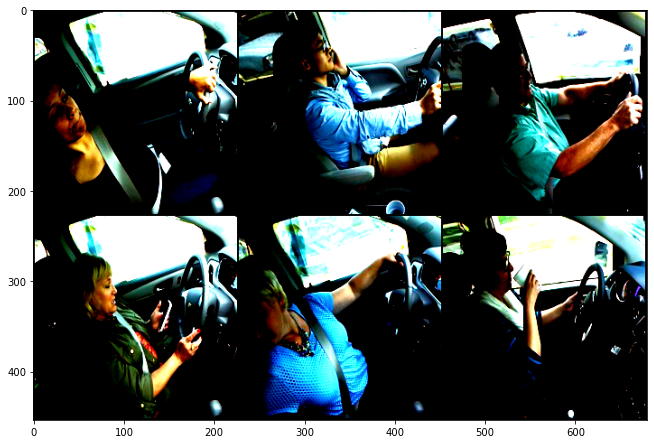

In [10]:
#function for printing images in grid
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size=6,shuffle=True)
  for data in loader:
    images , labels = data
    break
  print(labels)
  print(images.view(-1,224*224).shape)
  grid = torchvision.utils.make_grid(images,nrow=3)
  plt.figure(figsize=(11,11))
  plt.imshow(np.transpose(grid,(1,2,0)))
  plt.show()
  

show_transformed_images(train_dataset)

In [11]:
torch.cuda.is_available()

True

In [12]:

#model
num_classes = 10
net = torchvision.models.quantization.mobilenet_v3_large(pretrained=True)
net.fc = nn.Linear(100, num_classes)
gpu_net = net.to('cuda')

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(gpu_net.parameters(), lr=0.001, momentum=0.9, nesterov=True)

# Code snippet from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
for epoch in range(3):  # loop over the dataset multiple times

    running_train_loss = 0.0
    print('train load')
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = gpu_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
        # print statistics
        running_train_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] Train loss: %.3f' %
                  (epoch + 1, i + 1, running_train_loss / 50))
            running_train_loss = 0.0

    running_val_loss = 0.0
 

print('Finished Training and Validation')


train load
[1,    50] Train loss: 4.367
[1,   100] Train loss: 1.286
[1,   150] Train loss: 0.678
[1,   200] Train loss: 0.502
[1,   250] Train loss: 0.332
[1,   300] Train loss: 0.321
[1,   350] Train loss: 0.283
[1,   400] Train loss: 0.187
[1,   450] Train loss: 0.190
[1,   500] Train loss: 0.185
[1,   550] Train loss: 0.201
[1,   600] Train loss: 0.119
[1,   650] Train loss: 0.101
[1,   700] Train loss: 0.138
[1,   750] Train loss: 0.098
[1,   800] Train loss: 0.084
[1,   850] Train loss: 0.083
[1,   900] Train loss: 0.080
[1,   950] Train loss: 0.106
[1,  1000] Train loss: 0.110
[1,  1050] Train loss: 0.088
[1,  1100] Train loss: 0.065
[1,  1150] Train loss: 0.060
[1,  1200] Train loss: 0.077
train load
[2,    50] Train loss: 0.037
[2,   100] Train loss: 0.041
[2,   150] Train loss: 0.055
[2,   200] Train loss: 0.048
[2,   250] Train loss: 0.087
[2,   300] Train loss: 0.038
[2,   350] Train loss: 0.052
[2,   400] Train loss: 0.037
[2,   450] Train loss: 0.030
[2,   500] Train loss

In [13]:
 for epoch in range(3):
    print('val load')
    for i, data in enumerate(val_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = gpu_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_val_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] Validation loss: %.3f' %
                  (epoch + 1, i + 1, running_val_loss / 50))
            running_val_loss = 0.0


val load
[1,    50] Validation loss: 0.050
[1,   100] Validation loss: 0.016
[1,   150] Validation loss: 0.021
[1,   200] Validation loss: 0.020
[1,   250] Validation loss: 0.031
[1,   300] Validation loss: 0.063
val load
[2,    50] Validation loss: 0.045
[2,   100] Validation loss: 0.005
[2,   150] Validation loss: 0.021
[2,   200] Validation loss: 0.007
[2,   250] Validation loss: 0.016
[2,   300] Validation loss: 0.010
val load
[3,    50] Validation loss: 0.047
[3,   100] Validation loss: 0.022
[3,   150] Validation loss: 0.011
[3,   200] Validation loss: 0.004
[3,   250] Validation loss: 0.013
[3,   300] Validation loss: 0.009


In [14]:
#testing model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = gpu_net(x.to('cuda'))
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1
    print('accuracy:\t',round(correct/total,3))

accuracy:	 0.988


In [15]:
x, y = next(iter(test_loader)) 

In [16]:
x[0]

tensor([[[-0.7011, -0.7011, -0.7011,  ...,  1.2611, -0.9410, -0.5175],
         [-0.7011, -0.7152, -0.7152,  ...,  1.1623, -1.0116, -0.5458],
         [-0.7152, -0.7293, -0.7293,  ...,  1.1764, -0.9975, -0.5175],
         ...,
         [-1.0540, -1.0540, -1.0540,  ..., -0.8846, -0.9128, -0.9552],
         [-1.0540, -1.0540, -1.0540,  ..., -0.8846, -0.9128, -0.9269],
         [-1.0681, -1.0540, -1.0540,  ..., -0.9128, -0.9128, -0.9128]],

        [[-0.7133, -0.7133, -0.7133,  ...,  1.3738, -0.7011, -0.4814],
         [-0.7133, -0.7255, -0.7255,  ...,  1.3250, -0.7743, -0.5058],
         [-0.7255, -0.7377, -0.7377,  ...,  1.3860, -0.7499, -0.4936],
         ...,
         [-1.1039, -1.1039, -1.1039,  ..., -0.9818, -1.0062, -1.0428],
         [-1.1039, -1.1039, -1.1039,  ..., -0.9696, -1.0062, -1.0306],
         [-1.1161, -1.1039, -1.1039,  ..., -0.9940, -0.9940, -1.0184]],

        [[-0.8222, -0.8222, -0.8222,  ...,  1.3808, -0.7005, -0.4936],
         [-0.8222, -0.8344, -0.8344,  ...,  1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


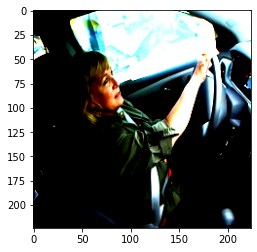

In [17]:
#checking for single images

print(y[8])
plt.imshow(np.transpose(x[8],(1,2,0)))
plt.show()

In [18]:
output = gpu_net(x.to('cuda'))
for idx, i in enumerate(output):
    if torch.argmax(i) == y[idx]:
        print('  correct',torch.argmax(i),y[idx])
    else:
        print('uncorrect',torch.argmax(i),y[idx])

  correct tensor(1, device='cuda:0') tensor(1)
  correct tensor(4, device='cuda:0') tensor(4)
  correct tensor(6, device='cuda:0') tensor(6)
  correct tensor(5, device='cuda:0') tensor(5)
  correct tensor(9, device='cuda:0') tensor(9)
  correct tensor(7, device='cuda:0') tensor(7)
  correct tensor(0, device='cuda:0') tensor(0)
  correct tensor(0, device='cuda:0') tensor(0)
  correct tensor(0, device='cuda:0') tensor(0)
  correct tensor(7, device='cuda:0') tensor(7)
